# **PARCIAL DE INTELIGENCIA ARTIFICIAL**
1.   Luisa Fernanda Monsalve Serrano
2.   Paula Andrea Caicedo Escobar


**PRESENTACIÓN DE LA INFORMACIÓN**

La base de datos esta compuesta de 18 grabaciones de ECG, de pacientes remitidos al "the Arrhythmia Laboratory" del Hospital Beth Israel de Boston (actual Centro Médico Beth Israel Deaconess). Los pacientes incluidos en este conjunto de datos no presentaban arritmias significativas; incluyen 5 hombres, de entre 26 y 45 años, y 13 mujeres, de entre 20 y 50 años.


Del conjunto de datos obtenidos de la base de datos, lo primero que se hace es la instalación del paquete que permite leer las señales cardiacas, asi mismo se instalan las librerias necesarias para el desarrollo del modelo.


 





# **INSTALACIÓN DE PAQUETES**


*   Para el manejo de señales ECG se instala *wfdb*
*   Para la creación y estudio del modelo librerias de *sklearn*
*   Para la creación del dataframa la libreria*pandas*



---





In [1]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 13.5 MB/s 


In [2]:
import wfdb
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score




Para la recolección de datos, se decidio por utilizar para la primera señal del conjunto de datos obtenidos, con el se obtienen mas 400.000 los cuales son registros de latidos y no latidos

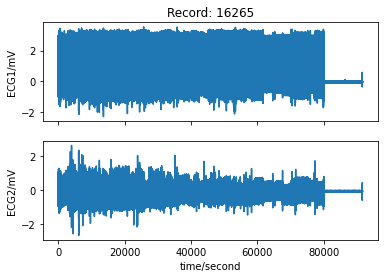

In [3]:
data_1 =  wfdb.rdrecord("database/16265")
wfdb.plot_wfdb(data_1)

Para identificar las señales que son latidos, se hace la lectura de los ATRm y se hace el conteo de cuantos datos son considerados latidos y cuantos datos exiten en la señal.

In [4]:
ATR = wfdb.rdann('database/16265','atr').sample
print(ATR)
print(ATR.shape)

señal = data_1.p_signal
registro_1 = señal[:,0]
print(registro_1)
print(registro_1.shape)

[       1       52      129 ... 10247715 10247823 10247936]
(100955,)
[-0.165 -0.155 -0.195 ... -0.05  -0.05  -0.05 ]
(11730944,)


Se pudo identificar en primer medida que los cantidad de registros identificados como latidos son 100955, que se encuentra dentro del 11730944 registros de la señal. Por ende, el primero proceso a realizar es hacer la ventana que contiene el latido, para el caso del ejercicio la ventana es de 10 registro, y se hace la prueba con el primer latido de la lista de ART.


[-0.155 -0.205 -0.215 -0.215 -0.165 -0.165 -0.155 -0.615 -0.855 -0.185
  1.295  2.575  2.675  2.445  0.735 -0.415 -0.295 -0.285 -0.345 -0.365]
(20,)


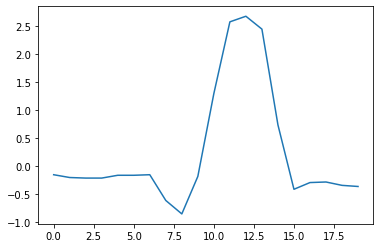

In [5]:
#EL CONJUNTO DE DATOS QUE ES CONSIDERADO LATIDO
N = 10
latido = registro_1[ATR[1]-N:ATR[1]+N] #Las caracetristicas se sacan a cada conjunto
print(latido)
print(latido.shape)
plt.plot(latido)

Posteriormente, se hace un análisis del conjunto de datos que no es considerado como latino, el tamaño de la ventana es igual, pero el tamaño del conjunto de los datos es mas grande, por ende lo que se hace es dividir ese conjunto en tamaños mas pequeños para que todos esten contenidos en el mismo tamaño de la ventana. 

[-0.345 -0.305 -0.315 -0.305 -0.265 -0.235 -0.265 -0.245 -0.215 -0.195
 -0.175 -0.185 -0.155 -0.125 -0.145 -0.125 -0.145 -0.155 -0.185 -0.175
 -0.175 -0.165 -0.165 -0.115 -0.065 -0.095 -0.115 -0.075 -0.115 -0.155
 -0.105 -0.125 -0.135 -0.125 -0.115 -0.105 -0.135 -0.135 -0.135 -0.145
 -0.125 -0.115 -0.135 -0.135 -0.165 -0.155 -0.115 -0.085 -0.055 -0.055
 -0.045  0.065  0.005 -0.015 -0.055 -0.115 -0.135]
(57,)
[-0.345 -0.305 -0.315 -0.305 -0.265 -0.235 -0.265 -0.245 -0.215 -0.195
 -0.175 -0.185 -0.155 -0.125 -0.145 -0.125 -0.145 -0.155 -0.185 -0.175]
(20,)
[-0.175 -0.165 -0.165 -0.115 -0.065 -0.095 -0.115 -0.075 -0.115 -0.155
 -0.105 -0.125 -0.135 -0.125 -0.115 -0.105 -0.135 -0.135 -0.135 -0.145]
(20,)
[-0.125 -0.115 -0.135 -0.135 -0.165 -0.155 -0.115 -0.085 -0.055 -0.055
 -0.045  0.065  0.005 -0.015 -0.055 -0.115 -0.135]
(17,)


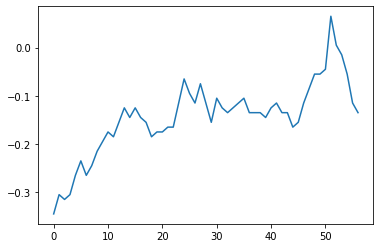

In [6]:

#EL CONJUNTO DE DATOS QUE NO ESE CONSIDERADO LATIDO
NN = 10
# 10 - 30 -> 16
# 30 - 50 -> 16
# 45 - len(No_latino)
No_latido = registro_1[ATR[1]+NN:ATR[2]-NN]
print(No_latido)
print(No_latido.shape)

l = registro_1[ATR[1]+NN:(ATR[1]+30)]

print(l)
print(l.shape)

x = registro_1[(ATR[1]+30):(ATR[1]+50)]
print(x)
print(x.shape)

y = registro_1[(ATR[1]+50):(ATR[2]-NN)]
print(y)
print(y.shape)

plt.plot(No_latido)

La prueba se realiza con el espacio entre el primer latido y el segundo latino, el conjunto de datos es de 57, entondes se hace una division de 3 partes en donde la ventana de 10 se mueve tres veces, objeniendo 3 registros en donde no se es considerado latido.

# **EXTRACCIÓN DE CARACTERISTICAS**

Para el dataset que se va a realizar se decide sacar el siguiente conjunto de caracteristicas, luego de análisis realizado a los datos obtenidos en los puntos anteriores, las caracteristicas son las siguiente:


*   Media
*   Varianza
*   Desviación Estandar
*   Pendiente
*   Kuntosis
*   Asimetria
*   Categoria

La función de la pendiente se hace por aparte, diferente porque no se utiliza ningúna libreria.




In [7]:
def pendiente(lista):
  y1 = np.amin(lista)
  y2 = np.amax(lista)
  x1 = np.where(lista==y1)[0][0]
  x2 = np.where(lista==y2)[0][0]
  return((y2-y1)/(x2-x1))


El siguiente proceso es crear el conjunto de datos, para eso se hace una lista de lista y se hace la ventana para cada una de las secciones de la señal, se se sacan las caracteristicas y se hace el mapeo de los datos: 


*   Los registros que son latidos se mapean a 1
*   Los registros que no son latidos se mapean a 0



In [8]:
registros = []

cont = 0
for i in range(1,(len(ATR)-1)):

  #print("i: ", i)
  #print("i: ", i+1)

  #PRIMERO SE HACE EL DEL LATIDO
  lat = registro_1[ATR[i]-N:ATR[i]+N]
  #print(lat.shape)
  

  med = np.mean(lat)
  var = np.var(lat)
  des = np.std(lat)
  pen = pendiente(lat)
  kur = stats.kurtosis(lat)
  asi = stats.skew(lat)

  temp = [med,var,des,pen,kur,asi,1]
  registros.append(temp)
  #print(temp)
  cont = cont  + 1 

  #LUEGO SE HACE EL DE QUE NO TIENE LATINO
  No_lat = registro_1[ATR[i]+NN:ATR[i+1]-NN]
  #print(No_lat.shape)



  if((No_lat.shape[0])!=0):

    if((No_lat.shape[0])>=60):

      x = 30
      y = NN
      t = 0
      total = int((No_lat.shape[0]/20))
      #print(total)

      while(total!= t):
        nl1 = registro_1[ATR[i]+y:(ATR[i]+x)]
        med = np.mean(nl1)
        var = np.var(nl1)
        des = np.std(nl1)
        pen = pendiente(nl1)
        kur = stats.kurtosis(nl1)
        asi = stats.skew(nl1)

        temp = [med,var,des,pen,kur,asi,0]
        registros.append(temp)

        y = x
        x = x + 20
        t = t + 1
        cont = cont + 1


         

      #print(total)

         

    

    if((No_lat.shape[0])>=41 and (No_lat.shape[0])<60):

      nl1 = registro_1[ATR[i]+NN:(ATR[i]+30)]
      med = np.mean(nl1)
      var = np.var(nl1)
      des = np.std(nl1)
      pen = pendiente(nl1)
      kur = stats.kurtosis(nl1)
      asi = stats.skew(nl1)

      temp = [med,var,des,pen,kur,asi,0]
      registros.append(temp)
      #print(temp)

      nl2 = registro_1[(ATR[i]+30):(ATR[i+1]-NN)]
      med = np.mean(nl2)
      var = np.var(nl2)
      des = np.std(nl2)
      pen = pendiente(nl2)
      kur = stats.kurtosis(nl2)
      asi = stats.skew(nl2)

      temp = [med,var,des,pen,kur,asi,0]
      registros.append(temp)
      #print(temp)

      cont = cont + 2

    if((No_lat.shape[0])>=10 and (No_lat.shape[0])<=15):

      nl1 = registro_1[ATR[i]+NN:(ATR[i+1]-NN)]
      med = np.mean(nl1)
      var = np.var(nl1)
      des = np.std(nl1)
      pen = pendiente(nl1)
      kur = stats.kurtosis(nl1)
      asi = stats.skew(nl1)

      temp = [med,var,des,pen,kur,asi,0]
      registros.append(temp)
      #print(temp)

      cont = cont + 1

      




     

     

     


   


   

   

print(cont)
print(len(registros))
  



463285
463285


Con la finalización del proceso se extraen 463.285 registros, para el dataset. Se definen las columnas y posteriormente se crea el dataframe

In [9]:
columnas =['Media','Varianza','Desviación-Est','Pendiente','Kurtosis','Asimetria','Categoria']
df = pd.DataFrame(registros, columns=columnas)
print(df)

           Media  Varianza  Desviación-Est  Pendiente  Kurtosis  Asimetria  \
0       0.254500  1.132965        1.064408   0.882500  0.529401   1.436697   
1      -0.213000  0.004396        0.066302   0.016923 -1.028796  -0.463465   
2      -0.106351  0.002531        0.050305   0.007742  2.068057   1.383953   
3       0.275500  1.178025        1.085368   0.950000  0.844009   1.516941   
4      -0.197500  0.005069        0.071195   0.015000 -1.137250  -0.265244   
...          ...       ...             ...        ...       ...        ...   
463280  0.192000  1.138301        1.066912   0.947500  0.807112   1.498911   
463281 -0.242500  0.010039        0.100194   0.017778 -1.188133   0.322965   
463282 -0.136000  0.011929        0.109220  -0.022308 -1.739297   0.050648   
463283 -0.233000  0.000156        0.012490   0.008571  3.960552  -1.613599   
463284 -0.208000  0.000201        0.014177   0.005455 -0.274894   0.117909   

        Categoria  
0               1  
1               0  
2  

In [10]:
df = df.drop_duplicates()
print(df.shape)

(461688, 7)


Se hace una verificación de que no exitan valores nulos.

In [11]:
df.isnull().sum()

Media             0
Varianza          0
Desviación-Est    0
Pendiente         0
Kurtosis          0
Asimetria         0
Categoria         0
dtype: int64

In [12]:
df[['Media','Categoria']].head(15)

,Media,Categoria
0,0.254500,1
1,-0.213000,0
2,-0.106351,0
3,0.275500,1
4,-0.197500,0
5,-0.097895,0
6,0.301000,1
7,-0.207000,0
8,-0.118784,0
9,0.253500,1


Del registro del DF, se hace un análisis de la cantidad de datos mapeados de 0 y 1, con esto se evidencia que existen un conjunto de datos mas grande que son considerados no latidos a los que son latidos.

In [13]:
df['Categoria'].value_counts()

0    360735
1    100953
Name: Categoria, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


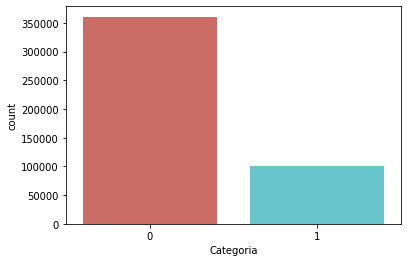

In [14]:
sns.countplot(df['Categoria'], palette='hls')

De acuerdo a el análisis se puede inferir que existe un desbalanceo de datos, y que el modelo probablemente tienda a reconocer a los registros como no latidos. Se hace un grafico de correlaión para analizar el conjunto de datos

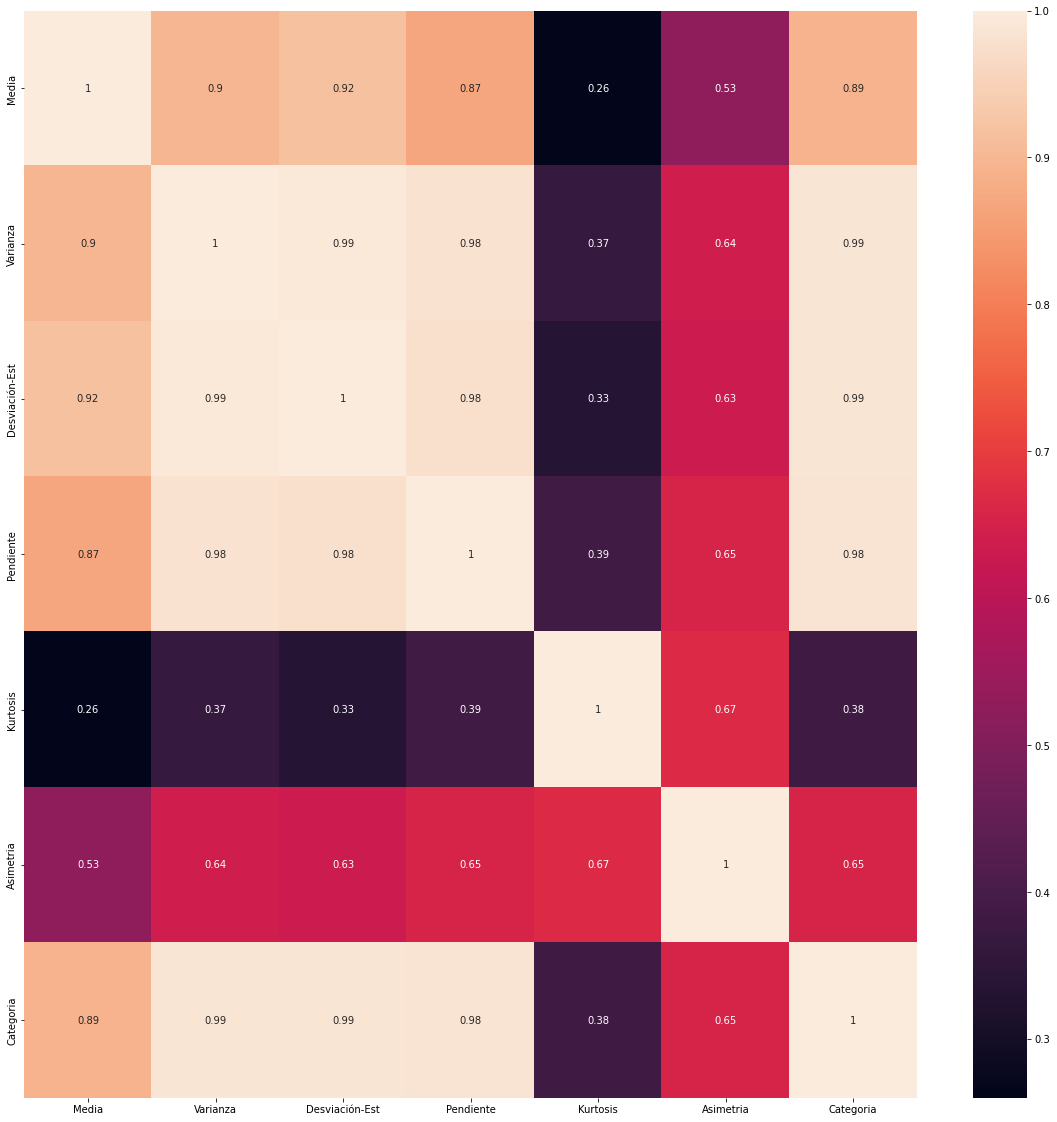

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Se hace una función con la que se esperar mostrar una matrix de confusión con los resultados del modelo. 

In [16]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

# **LIMPIEZA DE ATIPICOS**

Finalmente se hace una copia de la data, y se hace una limipieza de atipicos, porque segun el análisis la distancia de algunos latidos no es la misma, y para el modelo eso puede significar que la predicción puede verse afectada por ese sesgo

In [22]:
data = df.copy()

In [23]:
def IdentificarAtipicos(df, ft, valor):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    
    limite_inferior = q1 - valor * iqr
    limite_superior = q3 + valor * iqr
    
    ls = df.index[(df[ft]<limite_inferior) | (df[ft] > limite_superior)]
    return ls

def eliminar(df, index):
    index = sorted(set(index))
    df = df.drop(index)
    return df

aux = ['Media','Varianza','Desviación-Est','Pendiente','Kurtosis','Asimetria']
valor_alpha = 1.5
index_list = []
for i in aux:
  index_list.extend(IdentificarAtipicos(data, i,valor_alpha))

df_index = pd.DataFrame(index_list,columns = ["indices"])
df_index.duplicated().sum()
df_index = df_index.drop_duplicates()
final_index_list = df_index["indices"]
data = eliminar(data,final_index_list)
data

,Media,Varianza,Desviación-Est,Pendiente,Kurtosis,Asimetria,Categoria
1,-0.213000,0.004396,0.066302,0.016923,-1.028796,-0.463465,0
2,-0.106351,0.002531,0.050305,0.007742,2.068057,1.383953,0
4,-0.197500,0.005069,0.071195,0.015000,-1.137250,-0.265244,0
5,-0.097895,0.002300,0.047953,0.008966,2.574750,1.076495,0
7,-0.207000,0.005536,0.074404,0.021818,-1.115850,-0.431840,0
...,...,...,...,...,...,...,...
463278,-0.267000,0.000096,0.009798,0.008000,-0.140625,0.089304,0
463279,-0.243000,0.000926,0.030430,0.009286,1.756369,1.491780,0
463281,-0.242500,0.010039,0.100194,0.017778,-1.188133,0.322965,0
463282,-0.136000,0.011929,0.109220,-0.022308,-1.739297,0.050648,0


**RED NEURONAL SIN CONFIGURACIÓN DE HIPERPARAMETROS**

Para en análisis se hace una red neuronal sin heperparametros para estudiar la presición del modelo.

In [27]:
x = df[['Media','Varianza','Desviación-Est','Pendiente','Kurtosis','Asimetria']]
y = df['Categoria']

Se hace una división de los datos, para definir los de entrenamiento y para los de testeo

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    train_size=0.3,random_state=0)
 
print(len(X_train))
print(len(y_test))

138506
323182


In [29]:
clf = MLPClassifier().fit(X_train,y_train)

In [30]:
test_modelo = clf.predict(X_test)
print("F1 score: ", f1_score(y_test, test_modelo))

F1 score:  0.997844613661179


De acuerdo al score el modelo tiene 0.99 de precisión, pero de acuerdo al desbalanceo, la presición calculo puede deberse a que se necesita mirar como realiza las predicciónes, por ende se hace una matrix de confusión.

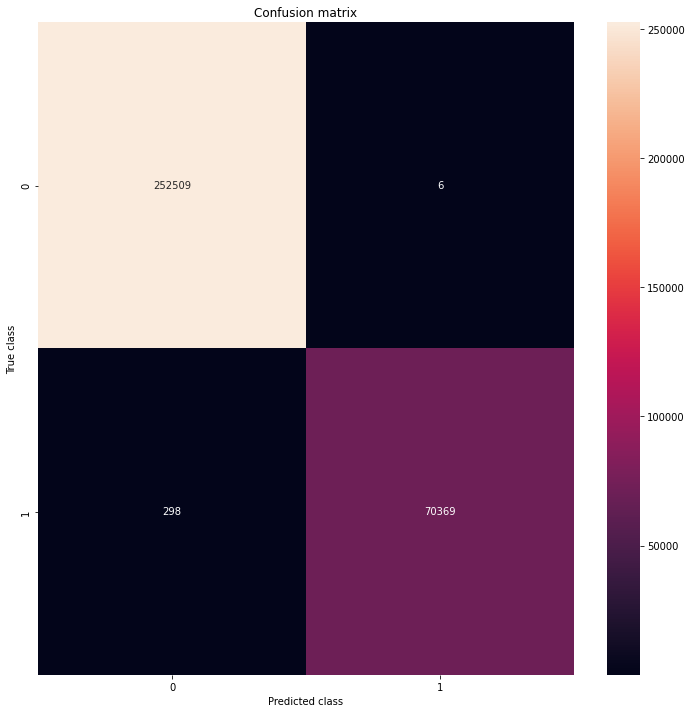

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    252515
           1       1.00      1.00      1.00     70667

    accuracy                           1.00    323182
   macro avg       1.00      1.00      1.00    323182
weighted avg       1.00      1.00      1.00    323182



In [31]:
mostrar_resultados(y_test,test_modelo)

De acuerdo al análisis, se puede evidenciar de que se usan 70667 registros de latidos, pero solo afirma que 70000 registros son latidos, teniendo en cuenta que siempre va tender a identificar lo que no es latido

**RED NEURONAL CONFIGURACIÓN DE HIPERPARAMETROS**

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [33]:
X_train, X_test_1, y_train, y_test_1 = train_test_split(x, y, stratify=y,
                                                    train_size=0.3,random_state=0)
 
print(len(X_train))
print(len(y_test_1))

138506
323182


Se hace una configuración usando, el RandomizedSearch, se busca los parametros ideales de acuerdo a un conjunto de datos que a la investigación se pusieron

In [34]:
mlp_gs = MLPClassifier()
parameters = {
    'hidden_layer_sizes':[(100,),(50,50,20),(20,),(200,),(100,100)],
    'activation':['logistic', 'tanh', 'relu'],
    'max_iter':np.arange(200,900,50),
    'learning_rate_init':np.arange(0.001,0.005,0.001),
    'tol':np.arange(0.001,0.005,0.001)
}


El entrenamiento se hace de acuerdo a la modificación de esos parametros y se evalua la precisión del modelo

In [35]:
clf_RDSCV = RandomizedSearchCV(mlp_gs, parameters, cv = 5, n_iter = 5)

In [36]:
clf_RDSCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=5,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 20),
                                                               (20,), (200,),
                                                               (100, 100)],
                                        'learning_rate_init': array([0.001, 0.002, 0.003, 0.004]),
                                        'max_iter': array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,
       850]),
                                        'tol': array([0.001, 0.002, 0.003, 0.004])})

In [37]:
print(clf_RDSCV.best_params_)
print(clf_RDSCV.best_score_)

{'tol': 0.002, 'max_iter': 300, 'learning_rate_init': 0.002, 'hidden_layer_sizes': (50, 50, 20), 'activation': 'relu'}
0.9990541920245727


In [38]:
test_modelo_RDSCV = clf_RDSCV.predict(X_test_1)
print(test_modelo)
print("F1 score: ", f1_score(y_test_1, test_modelo_RDSCV))

[1 0 0 ... 1 1 1]
F1 score:  0.9977595008508225


De acuerdo a las pruebas realizadas el modelo tiene un score del 0.99, se hace una matrix de confusión para analizar el detalle de la misma

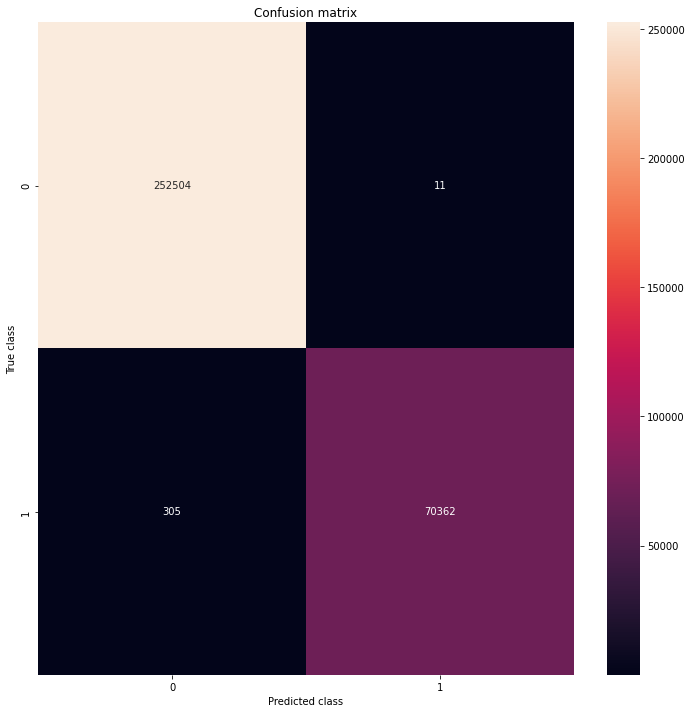

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    252515
           1       1.00      1.00      1.00     70667

    accuracy                           1.00    323182
   macro avg       1.00      1.00      1.00    323182
weighted avg       1.00      1.00      1.00    323182



In [39]:
mostrar_resultados(y_test_1,test_modelo_RDSCV)

Se un análisis y se determina que la precisión se debe que existen mas registros que no son latidos por ende, el desbalance tiene que ver con el score del modelo, y se puede inferir que no es preciso el modelo

**VENTANA DESLIZANTE**  
El análisis de la señal dada por el modelo se hace a partir del conjunto de datos de la señal 16539



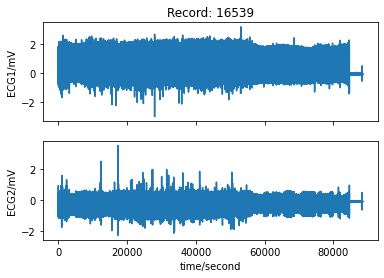

In [40]:
registro_prueba = wfdb.rdrecord("database/16539")
wfdb.plot_wfdb(registro_prueba)

In [42]:
señal = registro_prueba.p_signal
prueba = señal[:,0]
len(prueba)

11327488

In [53]:
inicio = 0
final = 17

datos = []


while(final != 10999):

  #print(final)

  temp = prueba[inicio:final]

  med = np.mean(temp)
  var = np.var(temp)
  des = np.std(temp)
  pen = pendiente(temp)
  kur = stats.kurtosis(temp)
  asi = stats.skew(temp)

  x = [med,var,des,pen,kur,asi]
  datos.append(x)
 
  inicio+=17
  final +=17
   

print(len(datos))

646


In [54]:
data_prueba = pd.DataFrame(datos, columns=['Media','Varianza','Desviación-Est','Pendiente','Kurtosis','Asimetria'])
data_prueba

,Media,Varianza,Desviación-Est,Pendiente,Kurtosis,Asimetria
0,-0.036176,0.008916,0.094426,0.019333,-1.317087,0.144137
1,-0.060294,0.007931,0.089055,-0.017857,-0.791924,0.913392
2,-0.132059,0.001268,0.035606,0.032500,0.738004,1.243634
3,-0.193235,0.001262,0.035519,-0.024000,1.605739,1.697827
4,-0.021471,0.331235,0.575530,-0.686667,1.733794,1.720907
...,...,...,...,...,...,...
641,-0.083824,0.008881,0.094239,0.047500,-0.228698,0.296258
642,-0.090294,0.022060,0.148527,0.053846,5.781661,2.220457
643,0.066765,0.219803,0.468831,-0.626667,3.070790,2.009395
644,0.077941,0.015280,0.123611,0.034615,-0.833988,-0.330425


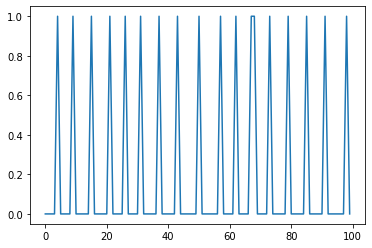

In [61]:
test = data_prueba[['Media','Varianza','Desviación-Est','Pendiente','Kurtosis','Asimetria']]
prediccion = clf_RDSCV.predict(test)
data_prueba['Categoria'] = prediccion
plt.plot(prediccion[:100])


In [65]:
prediccion[:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

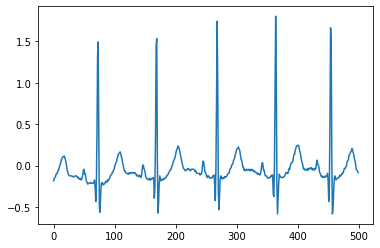

In [63]:
plt.plot(prueba[:500])

**¿Problemas puedes observar usando únicamente la grafica?**


Que no se hace la simulación de la señal como si fueran latidos, es decir la grafica afirma mas entradas de latidos, y no parece una señal de electrocardiogama.


**¿Por que se puede deber eso?**

Puede deberse al desbalance de clases, entonces la presición con que hace la predicción no es acertada o puede deberse a que el dataset contiene mas latidos de los que debe de tener, esto se puede ver en el análisis del registro porque la distancia de un latido a otro no es la misma.

**Mencione una estrategia que puedas utilizar o implementar para mejorarlo**

Para el desbalanceo se puede usar metodos de sobremuestro para que el modelo clasifique con mejor precision, sin embargo se debe de realizar una análisis del dataset, para revisar toda la señal, en caso de que existan datos de latidos irregulares, deberia de existir una categoria que lo identifique.